# Análise de dados da base Titanic

Pré requisitos para importar o dataset do Kaggle:

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download do dataset:

In [ ]:
! kaggle competitions download titanic

In [ ]:
! unzip titanic

# Bibliotecas utilizadas:

In [ ]:
! pip install --pre pycaret

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

# Análise:

Vamos analisar no geral o que possuimos nas tabelas de dados:

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gs = pd.read_csv('gender_submission.csv')

In [10]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_train.duplicated().value_counts()

False    891
dtype: int64

In [13]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Comentário:** Já observamos que a coluna *Age* possui alguns valores missing, devemos escolher como tratar esses dados. (Excluir dados missing? Substituir pela média?). A coluna *Cabin* possui poucos valores preenchidos, provavelmente será descartada da análise. Talvez também poderemos excluir colunas como: *PassengerId*, *Name* e *Ticket* de uma futura modelagem.

**Descrição do que as variáveis representam:** <br>
*Survived*: Indica se o passageiro sobreviveu. (0 = Não, 1 = Sim) <br>
*Pclass*: Classe do passageiro. (1 = Primeira, 2 = Segunda, 3 = Terceira) <br>
*Sex*: Sexo do passageiro. <br>
*Age*: Idade em anos. <br>
*SibSp*: Número de irmãos/cônjuges a bordo do Titanic. <br>
*Parch*: Número de pais/filhos a bordo do Titanic. <br>
*Ticket*: Número do bilhete. <br>
*Fare*: Tarifa de passageiro. <br>
*Cabin*: Número da cabine. <br>
*Embarked*: Porto de embarcação. (C = Cherbourg, Q = Queenstown, S = Southampton)


In [14]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [17]:
df_gs.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [18]:
data_unseen = df_test.merge(df_gs)

In [19]:
data_unseen.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# Descritiva Básica Univariada:

Text(0.5, 1.0, 'Quantidade de passageiros embarcados em cada porto de embarcação')

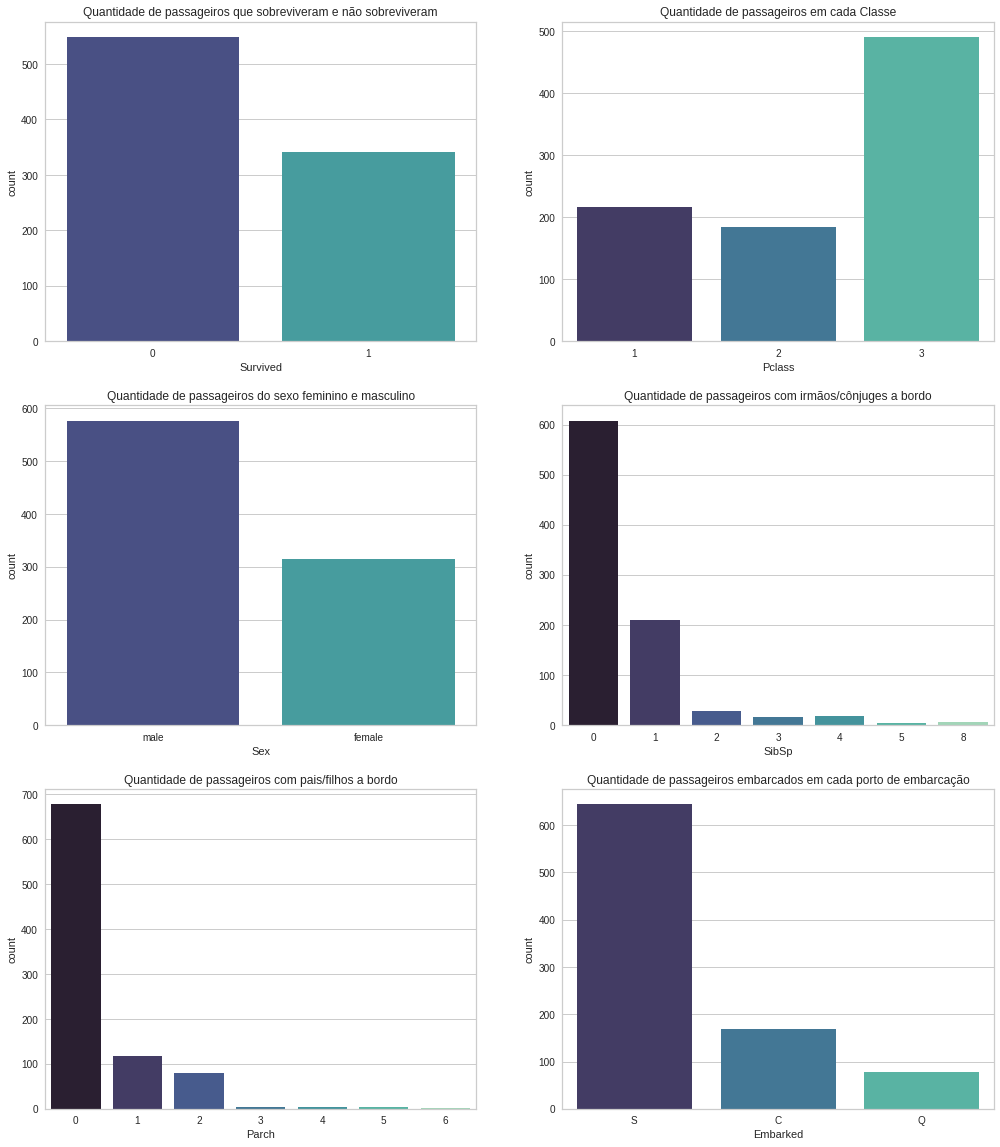

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17,20))

sns.countplot(data=df_train, x='Survived', palette='mako', ax=ax[0,0])
ax[0,0].set_title('Quantidade de passageiros que sobreviveram e não sobreviveram')

sns.countplot(data=df_train, x='Pclass', palette='mako', ax=ax[0,1])
ax[0,1].set_title('Quantidade de passageiros em cada Classe')

sns.countplot(data=df_train, x='Sex', palette='mako', ax=ax[1,0])
ax[1,0].set_title('Quantidade de passageiros do sexo feminino e masculino')

sns.countplot(data=df_train, x='SibSp', palette='mako', ax=ax[1,1])
ax[1,1].set_title('Quantidade de passageiros com irmãos/cônjuges a bordo')

sns.countplot(data=df_train, x='Parch', palette='mako', ax=ax[2,0])
ax[2,0].set_title('Quantidade de passageiros com pais/filhos a bordo')

sns.countplot(data=df_train, x='Embarked', palette='mako', ax=ax[2,1])
ax[2,1].set_title('Quantidade de passageiros embarcados em cada porto de embarcação')

**Comentário:** Já obtemos algumas informações, a maioria dos passageiros não sobreviveu, passageiros da terceira classe eram maioria, muito mais homens do que mulheres a bordo, a grande maioria dos passageiros não possuiam irmãos/cônjuges a bordo e/ou pais/filhos a bordo e a maioria dos passageiros embarcaram no porto de Southampton.

Text(0.5, 1.0, 'Quantidade de passageiros por valor da passagem menores que 50')

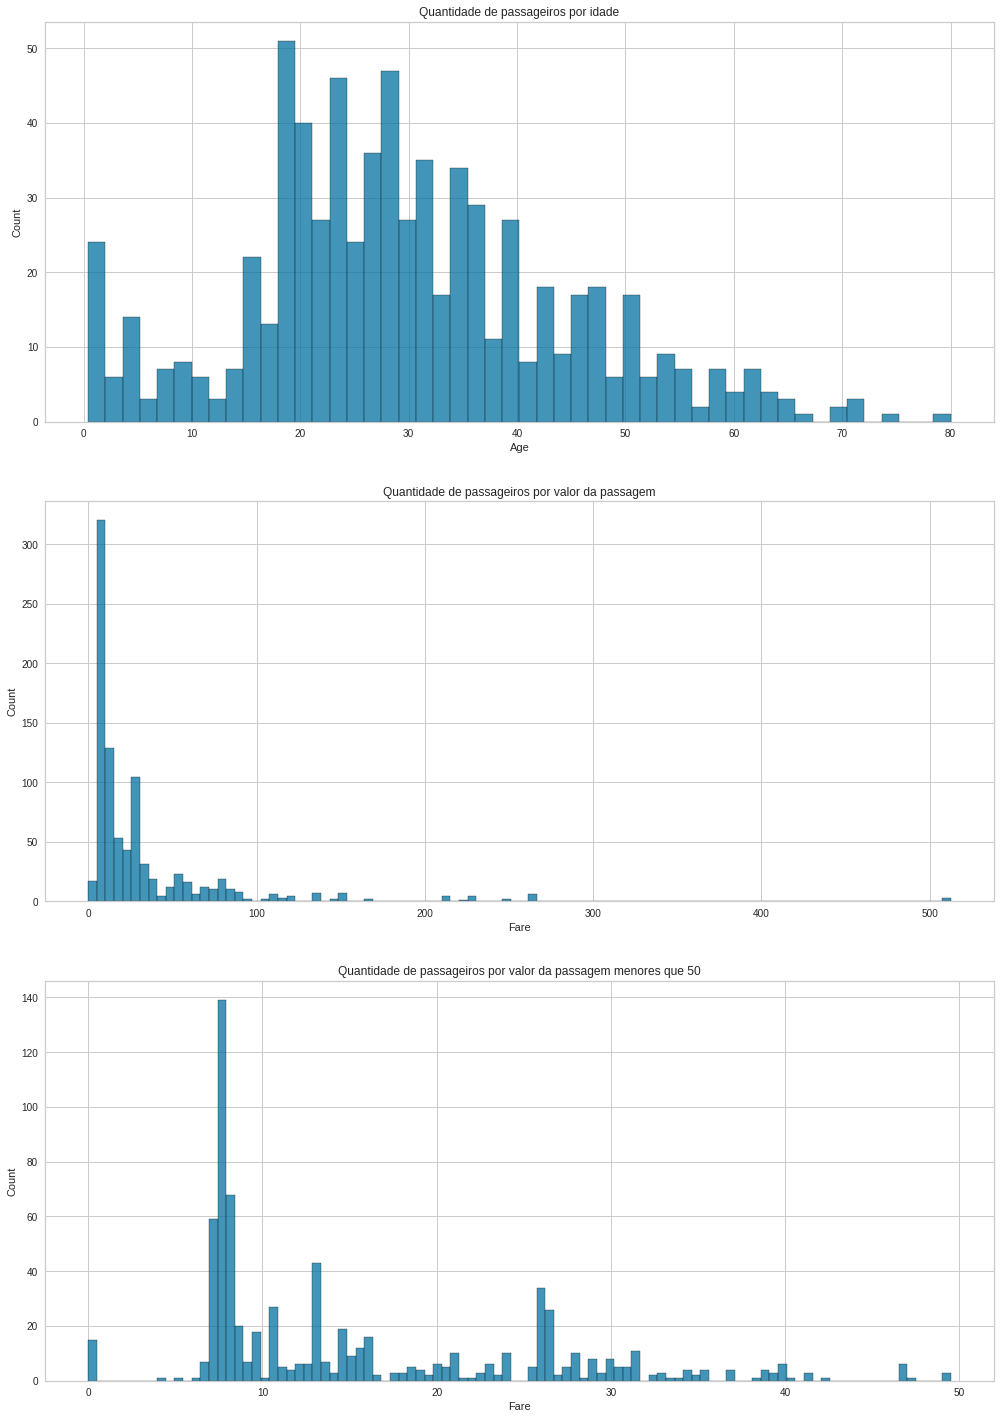

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(17,25))

sns.histplot(data=df_train, x='Age', palette='mako', bins=50, ax=ax[0])
ax[0].set_title('Quantidade de passageiros por idade')

sns.histplot(data=df_train, x='Fare', palette='dark', bins=100, ax=ax[1])
ax[1].set_title('Quantidade de passageiros por valor da passagem')

sns.histplot(data=df_train[df_train.Fare<50], x='Fare', palette='dark', bins=100, ax=ax[2])
ax[2].set_title('Quantidade de passageiros por valor da passagem menores que 50')

**Comentário:** Maior densidade de passageiros entre 15 a 40 anos e a grande maioria das passagens estão na faixa de valor abaixo de 10.

# Descritiva Bivariada:

(0.0, 1.0, 0.0, 1.0)

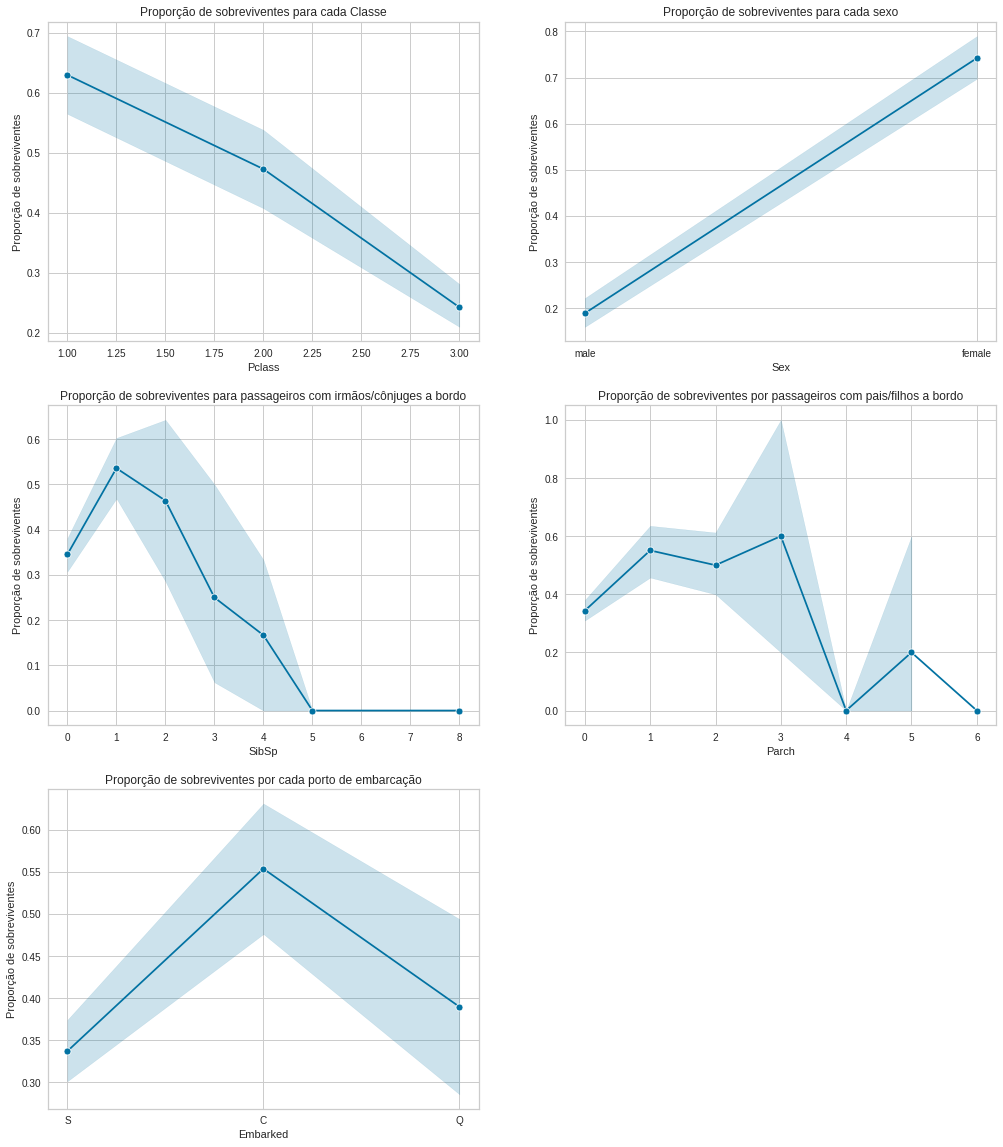

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17,20))

sns.lineplot(data=df_train, x='Pclass', y='Survived', palette='mako', ax=ax[0,0], marker='o')
ax[0,0].set_title('Proporção de sobreviventes para cada Classe')
ax[0,0].set_ylabel("Proporção de sobreviventes")

sns.lineplot(data=df_train, x='Sex', y='Survived', palette='mako', ax=ax[0,1], marker='o')
ax[0,1].set_title('Proporção de sobreviventes para cada sexo')
ax[0,1].set_ylabel("Proporção de sobreviventes")

sns.lineplot(data=df_train, x='SibSp', y='Survived', palette='mako', ax=ax[1,0], marker='o')
ax[1,0].set_title('Proporção de sobreviventes para passageiros com irmãos/cônjuges a bordo')
ax[1,0].set_ylabel("Proporção de sobreviventes")

sns.lineplot(data=df_train, x='Parch', y='Survived', palette='mako', ax=ax[1,1], marker='o')
ax[1,1].set_title('Proporção de sobreviventes por passageiros com pais/filhos a bordo')
ax[1,1].set_ylabel("Proporção de sobreviventes")

sns.lineplot(data=df_train, x='Embarked', y='Survived', palette='mako', ax=ax[2,0], marker='o')
ax[2,0].set_title('Proporção de sobreviventes por cada porto de embarcação')
ax[2,0].set_ylabel("Proporção de sobreviventes")

ax[2,1].axis('off')

**Comentário:** *Pclass* e *Sex* são variáveis que parecem ter valor estatístico para indentificar diferentes entre sobreviventes e não sobreviventes, as demais não parecem apresentar uma tendência a informar mais precisamente sobre sobreviventes.

Text(0.5, 1.0, 'Proporção de sobreviventes para intervalos de idade')

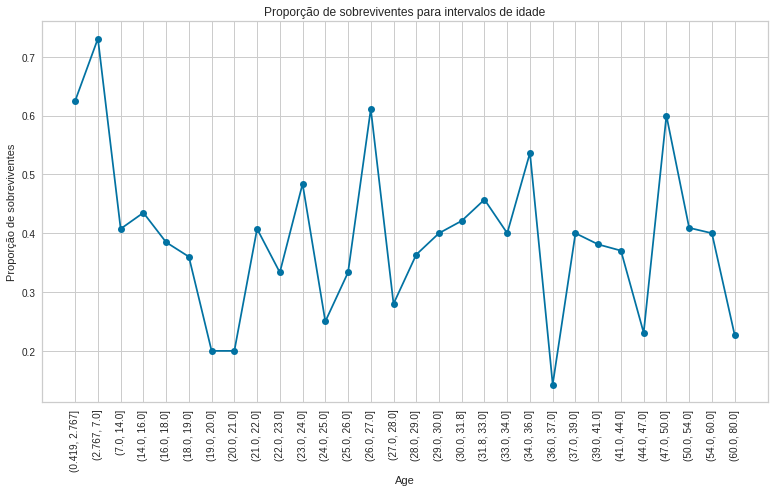

In [23]:
fig, ax = plt.subplots(figsize=(13,7))

cat_1, bins = pd.qcut(df_train['Age'], 30, retbins=True)
df_1 = df_train.groupby(cat_1)
biv = df_1['Survived'].mean()

ax = biv.plot.line(marker='o')
ax.set_ylabel("Proporção de sobreviventes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)
ax.set_title('Proporção de sobreviventes para intervalos de idade')

**Comentário:** A variável *Age* não parece fornecer uma correlação boa com a variável *Survived*.

Text(0.5, 1.0, 'Proporção de sobreviventes para intervalos de valor da passagem')

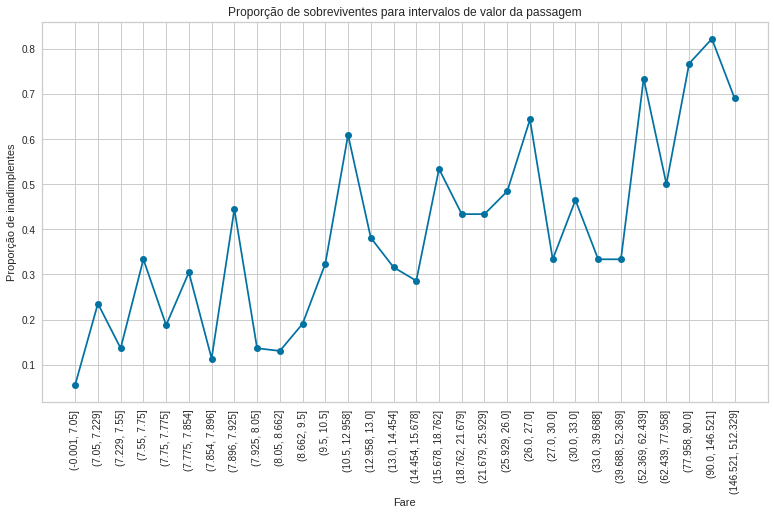

In [24]:
fig, ax = plt.subplots(figsize=(13,7))

cat_1, bins = pd.qcut(df_train['Fare'], 30, retbins=True)
df_1 = df_train.groupby(cat_1)
biv = df_1['Survived'].mean()

ax = biv.plot.line(marker='o')
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)
ax.set_title('Proporção de sobreviventes para intervalos de valor da passagem')

**Comentário:** A variável *Fare* não parece fornecer uma correlação boa com a variável *Survived*.

# Desenvolvimento do Modelo

Retirando colunas do Dataframe que não são interessantes para uma modelagem:

In [25]:
data = df_train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [26]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


Preparação do Ambiente para o Pycaret:

In [27]:
%%time

exp_clf = setup(data=data, 
                target = 'Survived', 
                session_id=123, 
                numeric_imputation = True,
                categorical_imputation = 'mode',
                fix_imbalance = True,
                remove_outliers = True,
                outliers_threshold = 0.02) 

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(1018, 10)"
5,Transformed train set shape,"(750, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,2


CPU times: user 1.73 s, sys: 25.9 ms, total: 1.76 s
Wall time: 2.04 s


Comparação rápida entre os modelos para decidirmos qual vamos utilizar:

In [28]:
%%time

best_model = compare_models(fold=10, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8057,0.8329,0.7069,0.7700,0.7345,0.5822,0.5857,0.2070
lightgbm,Light Gradient Boosting Machine,0.8025,0.8351,0.7069,0.7678,0.7318,0.5763,0.5814,0.2040
ada,Ada Boost Classifier,0.7960,0.8362,0.7699,0.7285,0.7435,0.5753,0.5815,0.2810
rf,Random Forest Classifier,0.7928,0.8316,0.6986,0.7516,0.7219,0.5572,0.5602,0.8980
et,Extra Trees Classifier,0.7897,0.8237,0.7069,0.7367,0.7196,0.5517,0.5536,0.2560
ridge,Ridge Classifier,0.7864,0.0000,0.7112,0.7328,0.7161,0.5458,0.5515,0.1740
lda,Linear Discriminant Analysis,0.7848,0.8448,0.7071,0.7317,0.7137,0.5422,0.5476,0.1120
lr,Logistic Regression,0.7784,0.8433,0.7406,0.7088,0.7189,0.5371,0.5433,0.9300
nb,Naive Bayes,0.7656,0.8148,0.7447,0.6804,0.7057,0.5123,0.5207,0.2380
dt,Decision Tree Classifier,0.7400,0.7185,0.6692,0.6591,0.6612,0.4509,0.4534,0.1930


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 8.21 s, sys: 260 ms, total: 8.47 s
Wall time: 50.1 s


In [29]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Vamos então criar um modelo utilizando o método Gradient Boosting Classifier:

In [30]:
%%time

model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8627,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8413,0.7543,0.7500,0.8182,0.7826,0.6580,0.6595
2,0.8095,0.9263,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.8065,0.8495,0.6522,0.7895,0.7143,0.5699,0.5759
4,0.7419,0.6902,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8065,0.8059,0.7083,0.7727,0.7391,0.5857,0.5871
6,0.8871,0.8783,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.7742,0.8410,0.7500,0.6923,0.7200,0.5313,0.5325
8,0.7581,0.8531,0.5833,0.7368,0.6512,0.4698,0.4773


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 738 ms, sys: 11.7 ms, total: 750 ms
Wall time: 2.88 s


Melhorar o modelo:

In [31]:
%%time

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8691,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8254,0.7927,0.7500,0.7826,0.7660,0.6268,0.6272
2,0.8571,0.9113,0.7083,0.8947,0.7907,0.6845,0.6952
3,0.8387,0.8573,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.7258,0.7105,0.5417,0.6842,0.6047,0.3991,0.4055
5,0.8065,0.8322,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.8871,0.8925,0.8333,0.8696,0.8511,0.7602,0.7607
7,0.7742,0.8553,0.7500,0.6923,0.7200,0.5313,0.5325
8,0.7258,0.8750,0.5417,0.6842,0.6047,0.3991,0.4055


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


CPU times: user 3.54 s, sys: 92.9 ms, total: 3.64 s
Wall time: 35.2 s


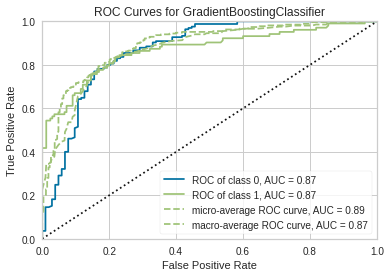

In [32]:
plot_model(tuned_model, plot = 'auc')

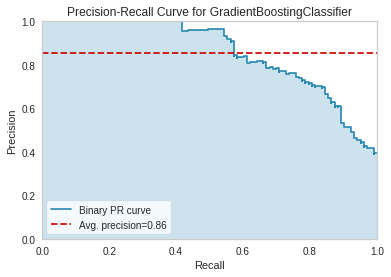

In [33]:
plot_model(tuned_model, plot = 'pr')

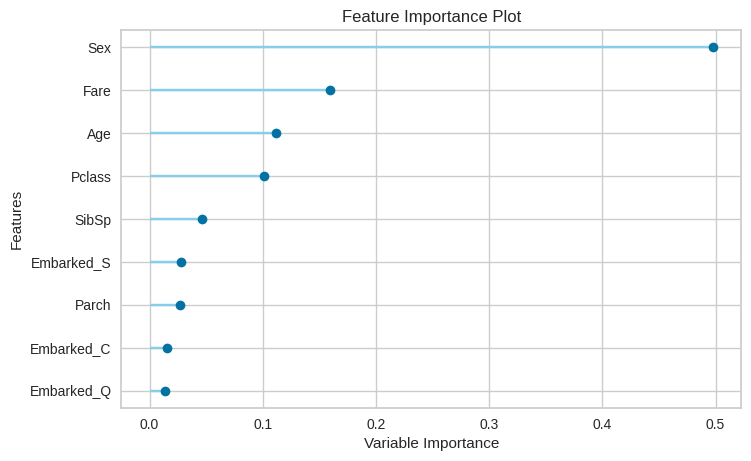

In [34]:
plot_model(tuned_model, plot = 'feature')

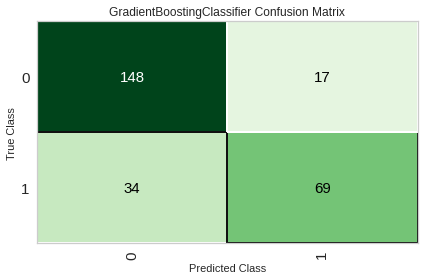

In [35]:
plot_model(tuned_model, plot = 'confusion_matrix')

Nos gráficos e na matrix de confusão concluímos que o modelo está relativamente conseguindo prever bem a variável resposta, AUC e precisão elevadas, temos que a variável que mais influenciou o modelo foi *Sex*, o que nos faz concluir que as mulheres realmente sobreviveram em maior porcentagem que os homens.

In [36]:
final_model = finalize_model(tuned_model)

In [37]:
print(final_model)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=True,
                                                              missing_values=nan,
                                                              strategy='constant',
                                                              verbose=0))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['Sex', 'Em...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.00

Teste com dados não utilizados no modelo:

In [38]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8612,0.9514,0.7829,0.8264,0.8041,0.6968,0.6974


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Survived,prediction_label,prediction_score
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0,0,0.5073
1,3.0,0.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1,0,0.5024
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0,0,0.5054
3,3.0,1.0,27.0,0.0,0.0,8.6625,1.0,0.0,0.0,0,0,0.5035
4,3.0,0.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,1,1,0.5021


E aqui concluimos que até na base de testes fornecida conseguimos umas acurácia de 0.8612 e um AUC de 0.9514, números grandes em uma modelagem de dados.